In [15]:
# Импортируем необходимые библиотеки
import os
import statsmodels.tsa.api as smt
from os import path
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv('data/Annual precipitation inches Lake Huron 1900 to 1986.csv')

Визуализация данных

<function matplotlib.pyplot.show(close=None, block=None)>

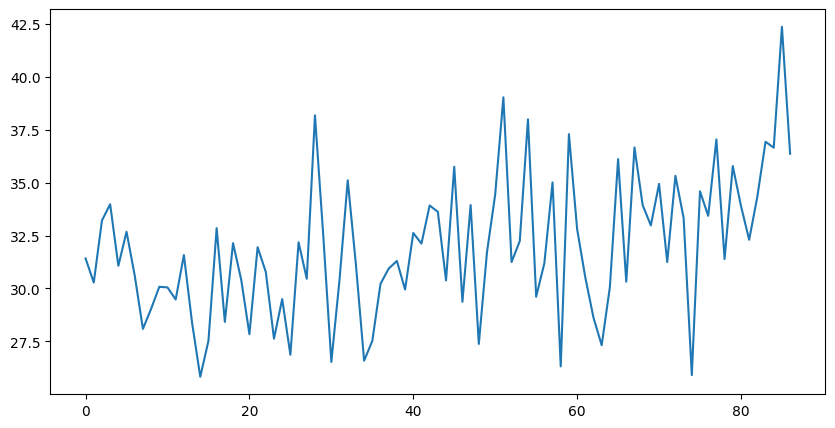

In [3]:
plt.figure(figsize = (10,5))
plt.plot(data['x'])
plt.show

Декомпозиция на составляющие(Аддитивная модель)

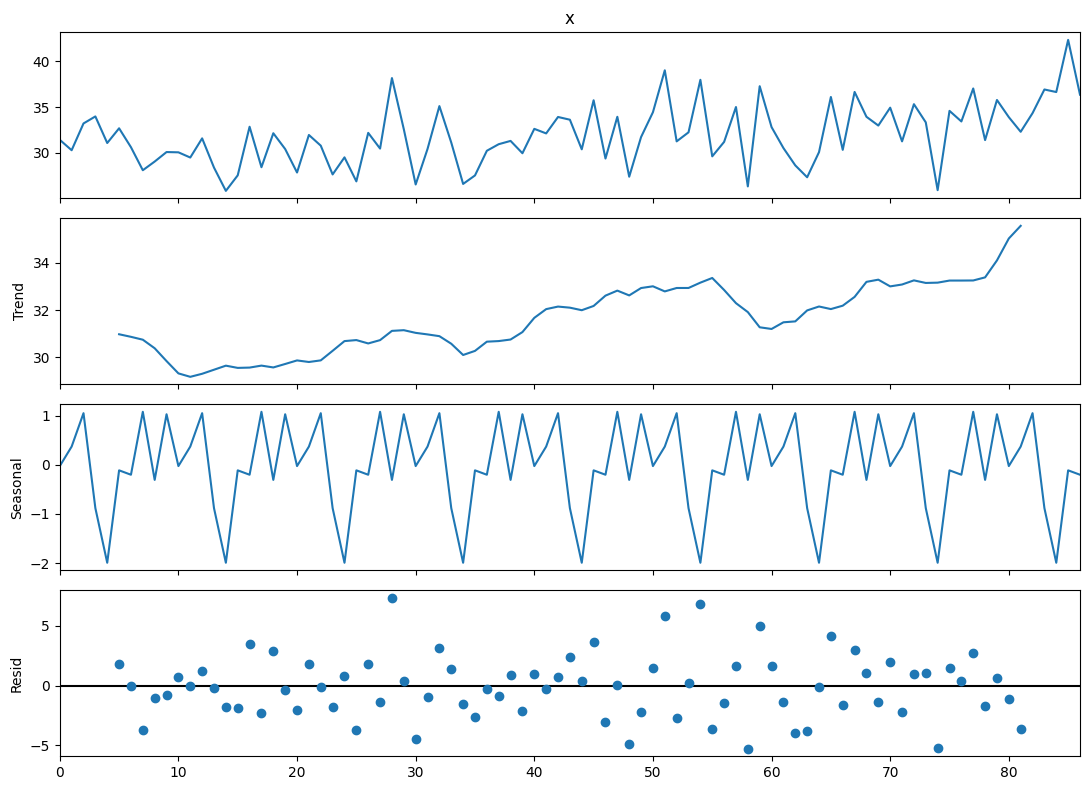

In [9]:
rcParams['figure.figsize'] = 11, 8
decompose = seasonal_decompose(data["x"], period=10)
decompose.plot()
plt.show()

Мультипликативная модель

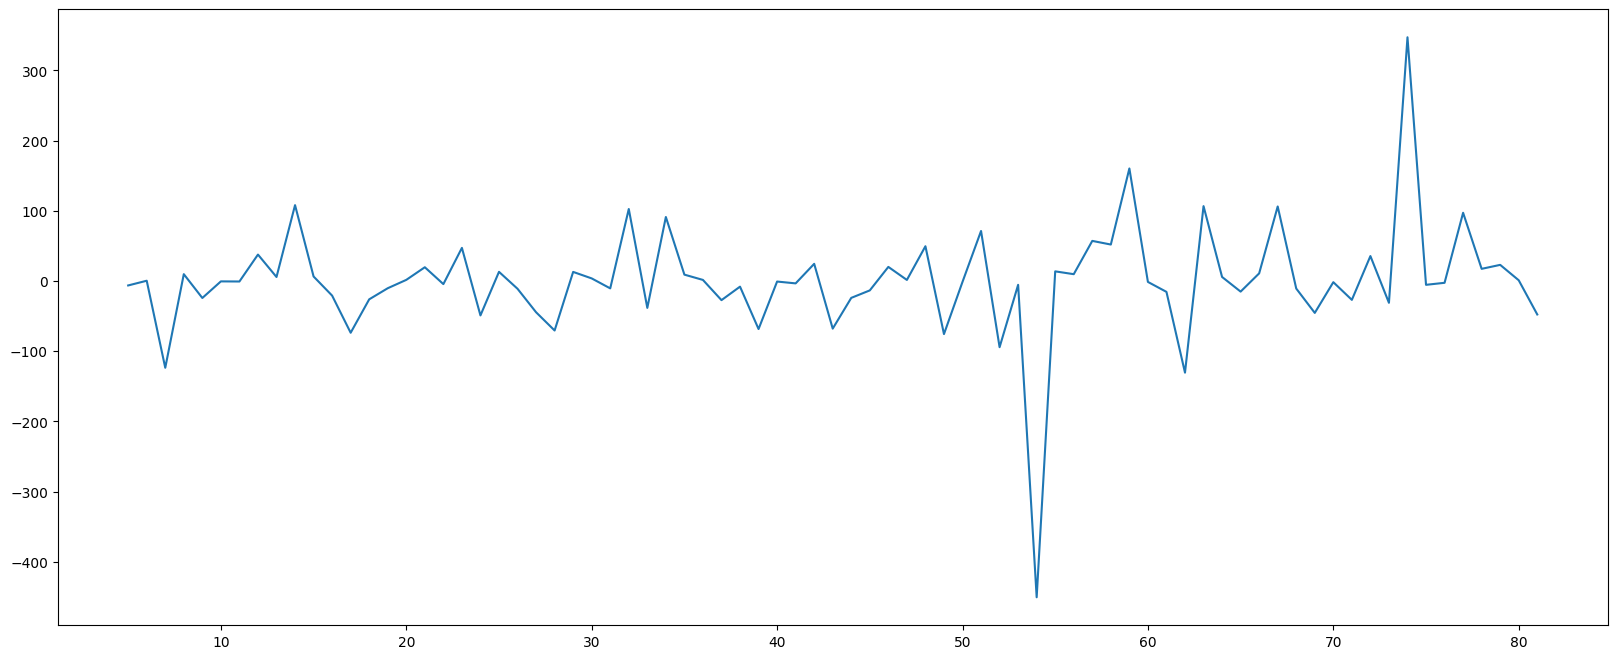

In [11]:
new_ps = decompose.trend*decompose.seasonal*decompose.resid

fig, axs = plt.subplots(figsize=(20, 8))
 
plt.plot(new_ps)
plt.show()

Удаляем тренд

<Axes: >

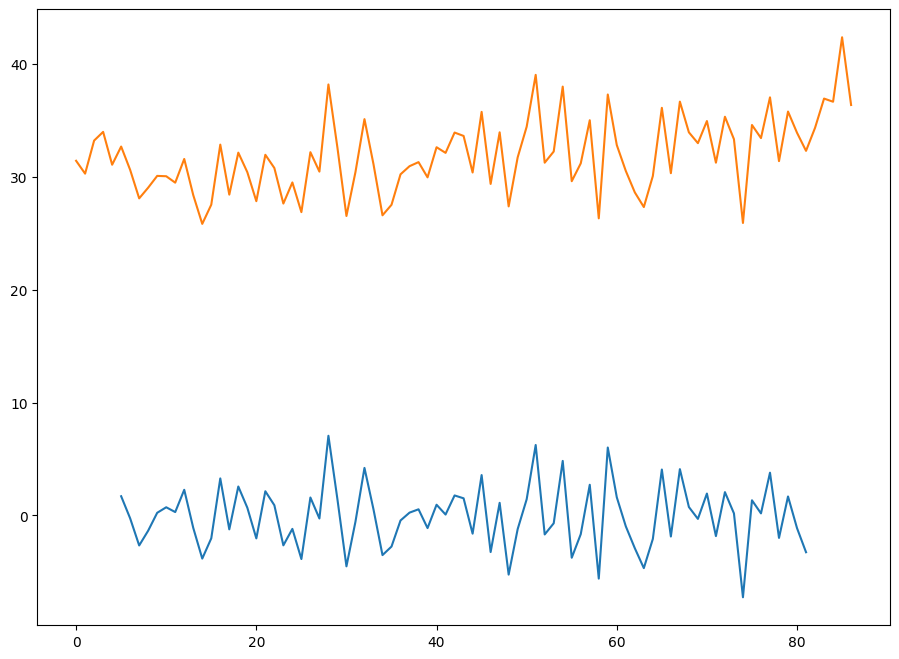

In [12]:
data_r = data["x"] - decompose.trend
data_r.plot()
data["x"].plot()

Проверим данный ряд на стационарность

In [14]:
alpha = 0.05
name = "Годовые осадочки"
ts = data["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha * 100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Годовые осадочки :
Test Statistic                 -4.348189
p-value                         0.000366
#Lags Used                      1.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


Полосы боллинждера

C:\Users\k_dys\AppData\Local\Temp\ipykernel_19896\1110318620.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


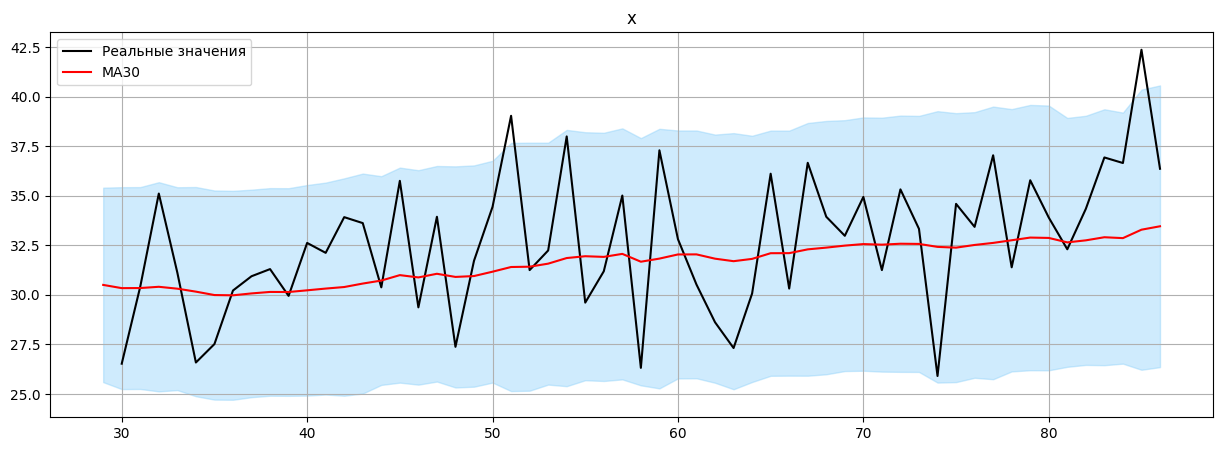

In [32]:
# указываем размер окна
window = 30

# вычисляем скользящее среднее и стандартное отклонение
rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()

plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")

# отрисовываем скользящее среднее
plt.plot(rolling_mean, 'g', label='MA'+str(window),
             color="red")

# отрисовываем верхний и нижний интервалы
lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)

plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                 color='lightskyblue', alpha=0.4)
plt.legend(loc='best')
# показываем сетку на графике
plt.grid(True)
plt.show()

Коррелограмма

<Figure size 1200x700 with 0 Axes>

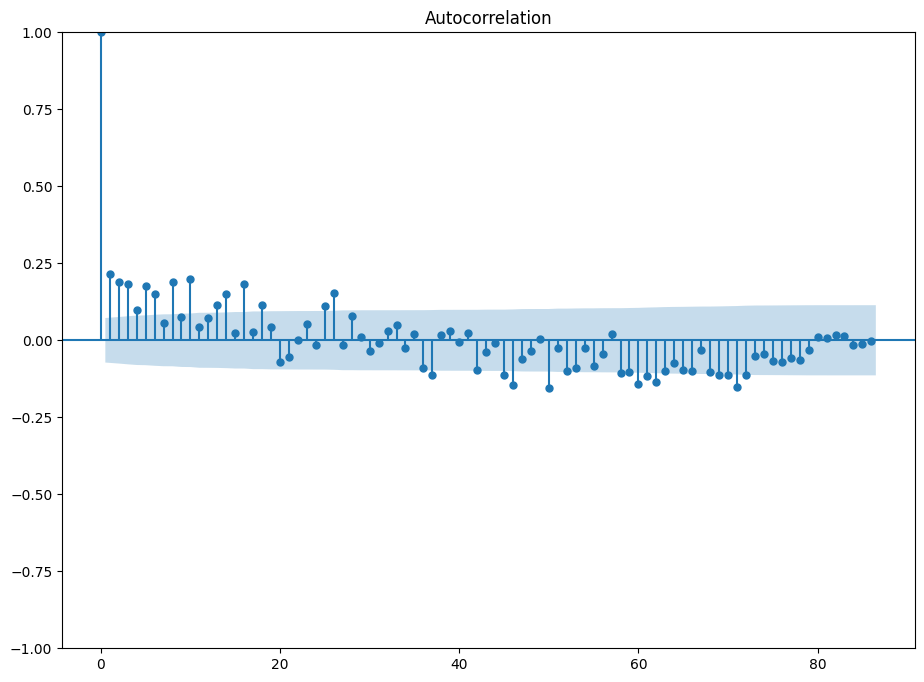

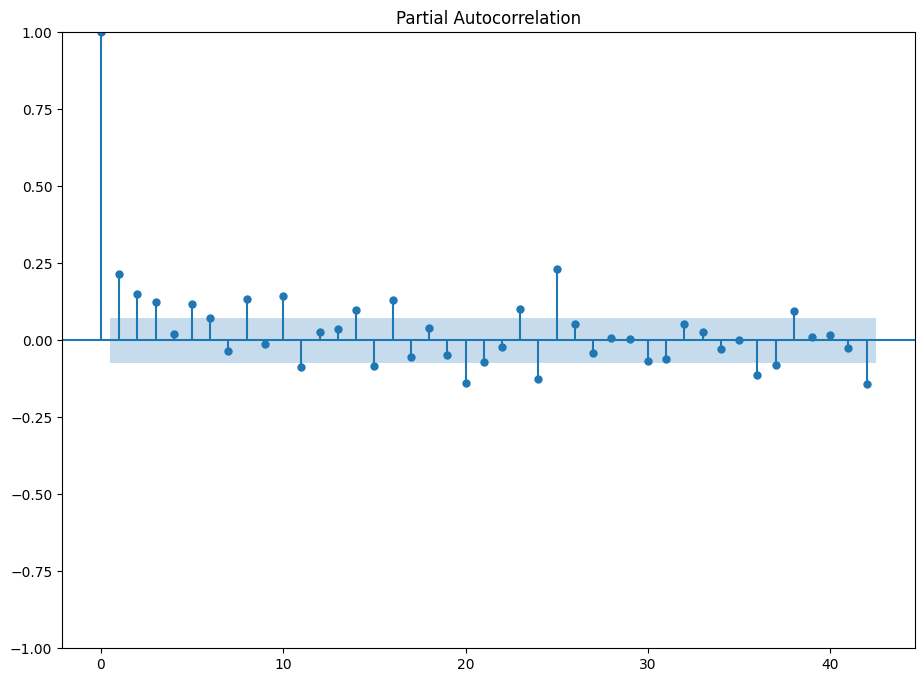

In [34]:
ts = data["x"]


fig = plt.figure(figsize=(12, 7))

ac_plot = smt.graphics.plot_acf(ts, lags=len(ts)-1, alpha=0.5)

pac_plot = smt.graphics.plot_pacf(ts, lags=len(ts)/2-1, alpha=0.5)

